# CW2: Data Mining the Diabetes Mellitus Database

### @ Md Golam Rabby Shuvo, Reg: 100370344

## Summary of Features

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load dataset
path = "/Users/shuvo/Downloads/demo/DiabetesClassificationDataset2022.csv"
df = pd.read_csv(path)

print("Data Loaded!")

Data Loaded!


In [3]:
df.head()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,CTICU,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,109.0,19.0,15.0,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,0,119.0,118.0,6.0,3.0,2.51,0.4,100.0,NaN,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,Med-Surg ICU,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,96.0,102.0,6.0,3.0,NaN,NaN,98.0,NaN,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,CTICU,35.6,34.8,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,1.6,1.1,NaN,NaN,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,34.0,1.6,1.1,NaN,NaN,NaN,NaN,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,8.0,1,116.0,114.0,6.0,4.0,NaN,NaN,100.0,30.0,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,Med-Surg ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,89.0,60.0,NaN,NaN,NaN,NaN,100.0,NaN,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,Med-Surg ICU,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,128.0,27.0,26.0,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,NaN,NaN,NaN,NaN,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,36.9,36.9,1.3,1.3,3.5,3.5,145.0,145.0,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,12.7,0,118.0,120.0,3.0,1.0,0.56,NaN,95.0,37.0,46.0,0,0,0,0,0,0,0,1,1


In [4]:
#Show information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

In [5]:
#Show statistics of all the columns
print(df.describe())

        encounter_id   hospital_id           age  elective_surgery  \
count   79159.000000  79159.000000  76317.000000      79159.000000   
mean   212863.726740    106.188620     62.452389          0.189404   
std     38113.816591     63.776527     16.446715          0.391831   
min    147001.000000      1.000000      0.000000          0.000000   
25%    179772.000000     49.000000     53.000000          0.000000   
50%    212864.000000    112.000000     65.000000          0.000000   
75%    245812.000000    165.000000     75.000000          0.000000   
max    278997.000000    204.000000     89.000000          1.000000   

             height        weight           bmi  readmission_status  \
count  77978.000000  77086.000000  76468.000000             79159.0   
mean     169.565316     85.114552     29.600786                 0.0   
std       10.835017     25.465505      8.487987                 0.0   
min      137.200000     38.600000     14.844926                 0.0   
25%      162.5

<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

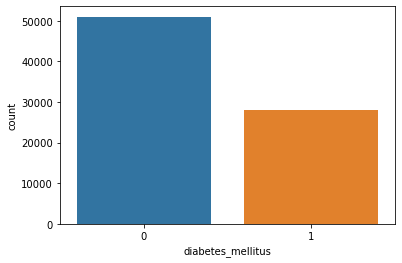

In [6]:
#Show distribution of the target class on whole dataset
sns.countplot(x='diabetes_mellitus', data=df)

In [7]:
#Show the number of missing data
missing = df.isnull().sum()
print(missing[0:88])

encounter_id                       0
hospital_id                        0
gender                            30
ethnicity                        961
age                             2842
elective_surgery                   0
height                          1181
weight                          2073
bmi                             2691
readmission_status                 0
icu_type                           0
h1_temp_max                    17936
h1_temp_min                    17936
d1_albumin_max                 43093
d1_albumin_min                 43093
d1_bilirubin_max               46477
d1_bilirubin_min               46477
d1_bun_max                      7910
d1_bun_min                      7910
d1_glucose_min                  4359
d1_hco3_max                    11901
d1_hco3_min                    11901
d1_inr_max                     49466
d1_inr_min                     49466
d1_lactate_max                 57809
d1_lactate_min                 57809
d1_platelets_max               11166
d

In [8]:
#Show the percentage of missing data
percent_missing = (df.isnull().sum()*100 / len(df)).round(2)
missing_df = pd.DataFrame({'Percent_missing' : percent_missing})
missing_df_sorted = missing_df.sort_values('Percent_missing', ascending = False)
print(missing_df_sorted)

                             Percent_missing
h1_bilirubin_min                       92.03
h1_bilirubin_max                       92.03
h1_albumin_min                         91.30
h1_albumin_max                         91.30
h1_lactate_min                         90.94
h1_lactate_max                         90.94
h1_pao2fio2ratio_max                   86.93
h1_pao2fio2ratio_min                   86.93
h1_arterial_ph_max                     82.60
h1_arterial_ph_min                     82.60
h1_arterial_pco2_min                   82.48
h1_arterial_pco2_max                   82.48
h1_arterial_po2_min                    82.29
h1_arterial_po2_max                    82.29
h1_hco3_max                            81.29
h1_hco3_min                            81.29
h1_calcium_min                         80.80
h1_calcium_max                         80.80
h1_bun_min                             80.10
h1_bun_max                             80.10
h1_creatinine_max                      79.93
h1_creatin

In [9]:
#Show the correlation of data
df.corr()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
encounter_id,1.000000,0.000501,-0.003167,0.000922,0.003625,0.002557,-0.000069,NaN,0.001032,0.002473,0.002358,0.001606,-0.013670,-0.014330,-0.000564,-0.000408,0.006592,0.003906,0.001148,-0.016664,-0.011829,-0.011643,-0.009777,0.003948,0.003251,-0.001533,-0.005102,0.004120,0.000734,0.004508,0.007222,-0.010264,-0.010576,0.003145,0.003199,-0.002048,-0.001934,0.002791,0.001948,-0.004401,-0.004351,0.000760,0.000539,-0.004214,-0.005443,-0.001940,-0.002744,-0.016664,-0.011829,0.004979,0.005556,-0.000014,0.000574,-0.008095,-0.010286,-0.003562,-0.003191,0.002449,0.001446,-0.002227,-0.007115,0.001477,0.001292,-0.003213,-0.000492,0.005657,-0.004224,-0.002133,-0.002039,0.002873,-0.001286,0.001223,-0.012701,0.002367,0.016001,-0.004203,0.001192,-0.002736,-0.003958,-0.000336,-0.001903,-0.001415,0.002943,-0.000246,-0.000177
hospital_id,0.000501,1.000000,-0.009479,0.028150,0.022557,0.015089,0.004617,NaN,-0.025291,-0.038762,-0.003913,-0.012947,0.004066,-0.000669,-0.006454,-0.006461,0.012454,-0.020060,-0.021891,-0.001328,-0.006332,0.005286,0.001676,-0.012671,-0.016636,0.002919,-0.023950,0.032821,0.018587,0.003533,-0.005727,-0.042730,-0.043045,-0.009538,-0.009719,-0.014497,-0.014744,-0.025480,-0.022976,-0.005292,-0.005571,0.005392,-0.001326,-0.019855,-0.017857,0.012849,0.009833,-0.001328,-0.006332,0.005199,0.004296,0.045823,0.040808,0.007612,-0.020767,0.038321,-0.007110,-0.027680,-0.032405,0.014527,0.012607,-0.018365,-0.033696,0.015769,0.005062,0.000319,0.010723,-0.012125,-0.000972,-0.013653,-0.006505,0.003679,0.007408,0.015267,-0.028492,-0.011289,-0.003009,0.002586,0.004221,-0.004269,0.004024,0.001545,-0.003919,0.025863,0.001710
age,-0.003167,-0.009479,1.000000,0.057143,-0.103643,-0.115393,-0.076549,NaN,-0.075809,-0.079332,-0.114196,-0.100862,-0.043473,-0.039731,0.230143,0.261401,0.056367,0.076061,0.123345,0.113202,0.124644,0.022207,0.045236,-0.086981,-0.085631,0.054852,0.120193,0.003539,0.049364,-0.007673,-0.006147,-0.111047,-0.110774,-0.029732,-0.029652,0.181187,0.181440,0.065400,0.069939,0.040328,0.040859,-0.101121,-0.081876,0.193366,0.193509,-0.119805,-0.120563,0.113202,0.124644,-0.002293,-0.001520,0.033082,0.032238,-0.023001,-0.034505,-0.134280,-0.112373,0.055514,0.051634,0.103068,0.096770,0.006052,-0.011199,-0.097768,-0.100100,-0.013990,0.010100,-0.145060,-0.157473,0.018943,0.019003,0.056167,-0.043096,-0.062896,0.044096,-0.019156,-0.024742,-0.023932,-0.017754,0.021246,0.026687,0.023909,0.025465,0.042940,0.096345
elective_surgery,0.000922,0.028150,0.057143,1.000000,0.019779,0.021266,0.010542,NaN,-0.116192,-0.156982,-0.028581,-0.039318,-0.010255,-0.018592,-0.165952,-0.165527,-0.010912,-0.005952,0.013276,-0.118361,-0.131473,0.002302,-0.022329,-0.058859,-0.091498,0.078191,0.034630,0.060595,0.043141,0.0

In [10]:
#Find highly correlated variables
corrMat = df.corr()
corrMat.loc[:,:] = np.tril(corrMat, k=-1)
already_in = set()
result = []
for col in corrMat:
    perfect_corr = corrMat[col][corrMat[col]==1].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)

print(result)

[['h1_inr_max', 'd1_inr_max'], ['h1_inr_min', 'd1_inr_min']]


## Data Pre-processing 

### Missing Data Handling

At first, dropping all the features whose have more than 60% missing data.

In [11]:
#Gives list of columns having more than 60% missing values
drop_column = percent_missing[percent_missing>60].keys()

#Drops the columns
df_1 = df.drop(drop_column, axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

In [12]:
#Show continuous and categorical columns
print(df_1.columns[df_1.dtypes!=object])
print(df_1.columns[df_1.dtypes==object])

Index(['encounter_id', 'hospital_id', 'age', 'elective_surgery', 'height',
       'weight', 'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_glucose_min',
       'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_glucose_max',
       'h1_glucose_min', 'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'diabetes_mellitus'],
      dtype='object')
Index(['gender', 'ethnicity', 'icu_type'], dtype='object')


In [13]:
CONTINUOUS_COLUMNS = ['encounter_id', 'hospital_id', 'age', 'elective_surgery', 'height',
       'weight', 'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_glucose_min',
       'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_glucose_max',
       'h1_glucose_min', 'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'diabetes_mellitus']
CATEGORICAL_COLUMNS = ['gender', 'ethnicity', 'icu_type']

Finally, imputation of the missing data. Here, `class` _DataFrameIputer_ which takes the 'TransformerMixin' class from scikit-learn, and uses the value after it and then with 0 for numeric columns and the most frequent value for non-numeric columns.

In [14]:
#Import TransformerMixin class from scikit-learn
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """
        Impute missing values.
        Columns of dtype object are imputed with the most frequent value in column.
        Columns of other types are imputed with the value that comes directly 
        after it in the same column, then replace all the remaining NA's with 0.
        """
    def fit(self, X, y=None):
        # Find most common value with value_counts() which returns 
        # counts in descending order so that the first element is the most frequently-occurring element.
        self.fill = pd.Series([X[c].value_counts().index[0]
            #Use that if type is object otherwise use filling with backward value and 0                   
            if X[c].dtype == np.dtype('O') else X[c].fillna(method='bfill', axis=0).fillna(0) for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


#Pass the whole data frame and apply for new class
df_2 = DataFrameImputer().fit_transform(df_1)
df_2.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.0,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.454036,0.189404,169.565825,85.141136,29.602947,0.0,36.721336,36.612534,2.953841,2.883822,1.157131,1.085078,26.599977,24.432905,116.146199,24.452594,23.131123,206.685241,195.717340,4.274462,3.938054,139.125637,137.617527,12.576919,11.343661,172.883830,163.830430,12.239305,0.155775,103.222451,99.832211,5.498010,3.497821,1.544835,98.107568,87.269899,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.451232,0.391831,10.831737,25.462159,8.485454,0.0,0.769038,0.793106,0.670859,0.675979,2.239023,2.136813,21.053722,19.221292,40.444216,4.393081,5.102174,89.722149,88.122015,0.676801,0.585883,4.806686,4.920611,6.788403,5.928729,98.654172,92.928938,6.946976,0.362644,21.940350,30.622049,1.255471,0.930120,1.598641,3.123160,42.058765,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,1.200000,1.100000,0.200000,0.200000,4.000000,3.000000,33.000000,12.000000,7.000000,27.000000,18.550000,2.800000,2.400000,123.000000,117.000000,1.200000,0.900000,0.000000,0.000000,0.900000,0.000000,58.000000,30.000000,1.000000,1.000000,0.300000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.800000,23.876404,0.0,36.400000,36.300000,2.500000,2.400000,0.400000,0.400000,13.000000,12.000000,91.000000,22.000000,20.000000,148.000000,137.000000,3.800000,3.600000,136.000000,135.000000,8.065000,7.500000,112.000000,108.000000,7.550000,0.000000,88.000000,87.000000,6.000000,3.000000,0.730000,97.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.039729,0.0,36.700000,36.700000,3.000000,2.900000,0.600000,0.600000,19.000000,18.000000,109.000000,24.000000,23.000000,195.000000,186.000000,4.200000,3.900000,139.000000,138.000000,11.100000,10.140000,143.000000,136.000000,10.500000,0.000000,101.000000,104.000000,6.000000,4.000000,1.000000,99.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.430000,33.421693,0.0,37.100000,37.000000,3.400000,3.400000,1.100000,1.000000,33.000000,30.000000,133.000000,27.000000,26.000000,251.000000,241.000000,4.600000,4.300000,142.000000,141.000000,15.350000,13.800000,197.000000,187.000000,15.300000,0.000000,117.000000,120.000000,6.000000,4.000000,1.610000,100.000000,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2789

### Encoding Categorical Values

Here, `OrdinalEncoder()` is used for the categorical label encoding.

In [15]:
import category_encoders as ce

# Ordinal encoder converts each categorical label to a number, 
# the columns are specified, and also it returns a dataframe.
enc = ce.OrdinalEncoder(cols = CATEGORICAL_COLUMNS, return_df = True)

#Fit the model and transform the data
df_3 = enc.fit_transform(df_2)
df_3.describe()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.0,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,1.457522,1.519852,62.454036,0.189404,169.565825,85.141136,29.602947,0.0,3.259566,36.721336,36.612534,2.953841,2.883822,1.157131,1.085078,26.599977,24.432905,116.146199,24.452594,23.131123,206.685241,195.717340,4.274462,3.938054,139.125637,137.617527,12.576919,11.343661,172.883830,163.830430,12.239305,0.155775,103.222451,99.832211,5.498010,3.497821,1.544835,98.107568,87.269899,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,0.498196,1.229879,16.451232,0.391831,10.831737,25.462159,8.485454,0.0,1.894218,0.769038,0.793106,0.670859,0.675979,2.239023,2.136813,21.053722,19.221292,40.444216,4.393081,5.102174,89.722149,88.122015,0.676801,0.585883,4.806686,4.920611,6.788403,5.928729,98.654172,92.928938,6.946976,0.362644,21.940350,30.622049,1.255471,0.930120,1.598641,3.123160,42.058765,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,1.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,1.000000,33.400000,32.900000,1.200000,1.100000,0.200000,0.200000,4.000000,3.000000,33.000000,12.000000,7.000000,27.000000,18.550000,2.800000,2.400000,123.000000,117.000000,1.200000,0.900000,0.000000,0.000000,0.900000,0.000000,58.000000,30.000000,1.000000,1.000000,0.300000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,1.000000,1.000000,53.000000,0.000000,162.500000,67.800000,23.876404,0.0,2.000000,36.400000,36.300000,2.500000,2.400000,0.400000,0.400000,13.000000,12.000000,91.000000,22.000000,20.000000,148.000000,137.000000,3.800000,3.600000,136.000000,135.000000,8.065000,7.500000,112.000000,108.000000,7.550000,0.000000,88.000000,87.000000,6.000000,3.000000,0.730000,97.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,1.000000,1.000000,65.000000,0.000000,170.000000,81.600000,28.039729,0.0,2.000000,36.700000,36.700000,3.000000,2.900000,0.600000,0.600000,19.000000,18.000000,109.000000,24.000000,23.000000,195.000000,186.000000,4.200000,3.900000,139.000000,138.000000,11.100000,10.140000,143.000000,136.000000,10.500000,0.000000,101.000000,104.000000,6.000000,4.000000,1.000000,99.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,2.000000,1.000000,75.000000,0.000000,177.800000,98.430000,33.421693,0.0,4.000000,37.100000,37.000000,3.400000,3.400000,1.100000,1.000000,33.000000,30.000000,133.000000,27.000000,26.000000,251.000000,241.000000,4.600000,4.300000,142.000000,141.0

### Outliers Detection and Handlling

Outliers detection using the `IsolationForest` algorithm.

In [16]:
#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=79159, random_state = 1, contamination= 0.01)
preds = clf.fit_predict(df_3)

#print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

Total number of outliers identified is:  792


Now, creating a mask or filter to ensure only those rows that are not outliers are retained in a new data frame.

In [17]:
# select all rows that are not outliers and create a boolean mask
mask = preds != -1

# Apply mask to new data frame and check shape
df_4 = df_3[mask]
print(df_4.shape)

(78367, 50)


### Feature Selection

Univariate feature selection with `SelectKBest` and `f_classif`.

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

#Specify the features to X and Y  
X = df_4.drop('diabetes_mellitus', axis=1)
Y = df_4['diabetes_mellitus']

# Keep all features but rank them by best f_classif score
selector = SelectKBest(f_classif, k=49)

#Fit and apply feature ranking method
X_new = selector.fit_transform(X, Y)

#Retrieve the column names for the selected columns
names = X.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Column_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Column_names'], ascending = [False, True])
print(ns_df_sorted)

#Look at shape of new data
X_new.shape

C:\Users\shuvo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\shuvo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


                   Column_names     F_Scores
30               h1_glucose_max  9206.020775
31               h1_glucose_min  8547.156670
8                           bmi  2950.884105
7                        weight  2562.326530
17                   d1_bun_max  2074.913764
18                   d1_bun_min  1796.154716
19               d1_glucose_min  1708.625941
38            creatinine_apache  1527.258684
24             d1_potassium_max   901.790606
4                           age   731.678701
27                d1_sodium_min   278.024870
15             d1_bilirubin_max   225.806802
16             d1_bilirubin_min   202.295362
21                  d1_hco3_min   192.618066
3                     ethnicity   181.492371
25             d1_potassium_min   128.669742
34             d1_heartrate_max    84.228514
37              gcs_eyes_apache    68.349387
36             gcs_motor_apache    67.764117
23             d1_platelets_min    63.077647
22             d1_platelets_max    52.902362
35        

(78367, 49)

In [19]:
best_20 = SelectKBest(f_classif, k=20).fit(X, Y)

mask = best_20.get_support() #list of booleans for selected features
best_feat = [] 
for bool, feature in zip(mask, X.columns):
 if bool:
    best_feat.append(feature)

print('The top 20 features are:{}'.format(best_feat)) # The list of your 5 best features

The top 20 features are:['ethnicity', 'age', 'weight', 'bmi', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_glucose_min', 'd1_hco3_min', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_min', 'h1_glucose_max', 'h1_glucose_min', 'd1_heartrate_max', 'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache']


C:\Users\shuvo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\shuvo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [20]:
#Drops all columns except top 20 best features
df_4.drop(df_4.columns.difference(best_feat), 1, inplace=True)
#Saves the final data as csv
df_4.to_csv('FinalX.csv', index=False)
Y.to_csv('FinalY.csv', index=False) #target column

C:\Users\shuvo\AppData\Local\Temp/ipykernel_8208/365931013.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_4.drop(df_4.columns.difference(best_feat), 1, inplace=True)
C:\Users\shuvo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Supervised Model Learning and Evaluation

### Sampling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = pd.read_csv('FinalX.csv')
y = pd.read_csv('FinalY.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

class_svc = SVC()
class_svc.fit(X_train, y_train)
y_pred = class_svc.predict(X_test)

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(y_test, y_pred)
print('Train and test data is ready:')

C:\Users\shuvo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train and test data is ready:


In [22]:
y_train.value_counts()

diabetes_mellitus
0                    40355
1                    22338
dtype: int64

<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

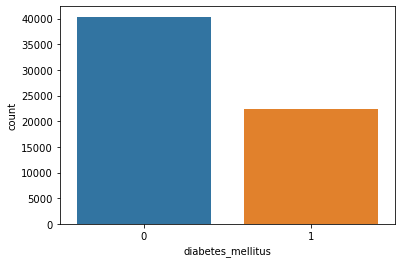

In [23]:
#Show distribution of the target class on train dataset
sns.countplot(x='diabetes_mellitus', data=y_train)

Upsampling the minority class to balance the data.

In [24]:
from sklearn.utils import resample

#The first thing is contatenate our training data back together.  
resampling = X_train.copy()
resampling['diabetes_mellitus']= y_train.values

# separate minority and majority classes
majority_class = resampling[resampling['diabetes_mellitus']==0]
minority_class = resampling[resampling['diabetes_mellitus']==1]

# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=40355,     # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled])

# Show dataset statistics
print(upsampled.describe())
 
# Display new class counts
upsampled.diabetes_mellitus.value_counts()

          ethnicity           age        weight           bmi  \
count  80710.000000  80710.000000  80710.000000  80710.000000   
mean       1.533973     62.989939     86.489276     30.073236   
std        1.240610     16.037365     25.757285      8.620212   
min        1.000000      0.000000     38.600000     14.844926   
25%        1.000000     54.000000     68.200000     24.257409   
50%        1.000000     65.000000     82.340000     28.500189   
75%        1.000000     75.000000    100.000000     34.054787   
max        6.000000     89.000000    186.000000     67.814990   

       d1_bilirubin_max  d1_bilirubin_min    d1_bun_max    d1_bun_min  \
count      80710.000000      80710.000000  80710.000000  80710.000000   
mean           1.088206          1.022069     27.296759     25.012333   
std            1.943476          1.853187     21.092612     19.276132   
min            0.200000          0.200000      4.000000      3.000000   
25%            0.400000          0.400000     13.

0    40355
1    40355
Name: diabetes_mellitus, dtype: int64

### Model Training

In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

X = upsampled.drop('diabetes_mellitus', axis=1)
y = upsampled['diabetes_mellitus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

knn_model = KNeighborsClassifier(n_neighbors = 2)
svm_model = SVC(kernel = 'rbf')
rf_model = RandomForestClassifier(n_estimators = 100)

#bundle up the classifiers
models = [knn_model, svm_model, rf_model]

#fit the classifiers with the data
for model in models:
    model.fit(X_train, y_train)

print('Models are built successfully!')

Models are built successfully!


### Evaluation

Accuracy and F1 Score

In [28]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
#get the predictions for each classifier
model_preds = [model.predict(X_test) for model in models]

#get the accuracies for each classifier
acc_s = [accuracy_score(y_test, y_pred) for y_pred in model_preds]
f1_s = [f1_score(y_test, y_pred) for y_pred in model_preds]

for i in range(len(acc_s)):
    print('Accureacy of ', models[i], ' is: ', acc_s[i])
    
for i in range(len(acc_s)):
    print('F1 Score of ', models[i], ' is: ', f1_s[i])

Accureacy of  KNeighborsClassifier(n_neighbors=2)  is:  0.7476149176062445
Accureacy of  SVC()  is:  0.7001610704993185
Accureacy of  RandomForestClassifier()  is:  0.8721348036178912
F1 Score of  KNeighborsClassifier(n_neighbors=2)  is:  0.7316912539515279
F1 Score of  SVC()  is:  0.6886258363355635
F1 Score of  RandomForestClassifier()  is:  0.8754826254826255


Confusion Matrix

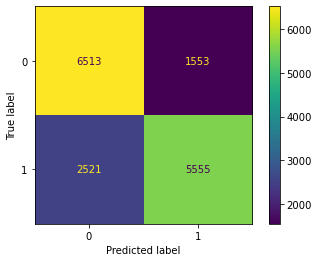

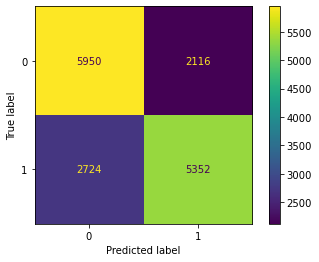

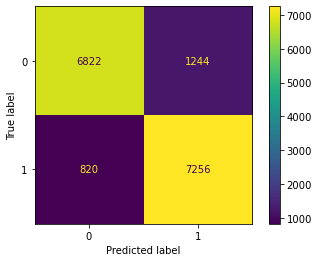

In [30]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#plotting the confusion matrix
for model in models:
    plot_confusion_matrix(model, X_test, y_test)

Precision and Recall curve, and ROC curve

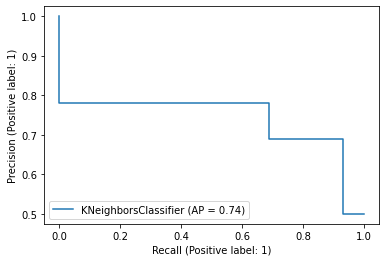

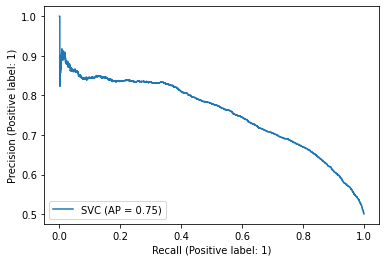

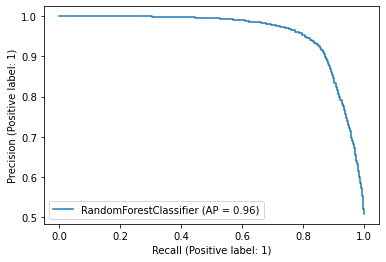

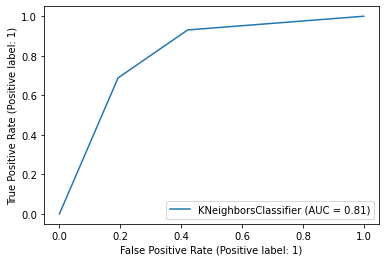

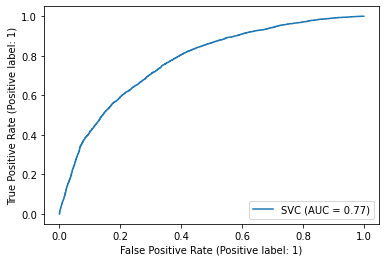

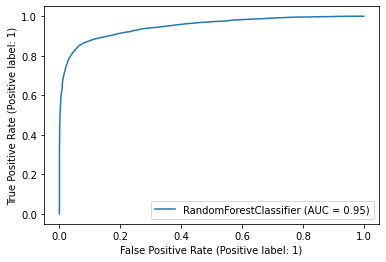

In [32]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

for model in models:
    plot_precision_recall_curve(model, X_test, y_test)

for model in models:
    plot_roc_curve(model, X_test, y_test)

## Unsupervised Clustering

### K-means Clustering

Dataset is divided into ratio of 1:2, and then half of the data is used for clustering

In [34]:
X = pd.read_csv('FinalX.csv')
y = pd.read_csv('FinalY.csv')

X_1st, X_2nd, y_1st, y_2nd = train_test_split(X, y, test_size = 0.5, random_state = 42)

Using the elbow method to plot elbow plot for the number of clusters

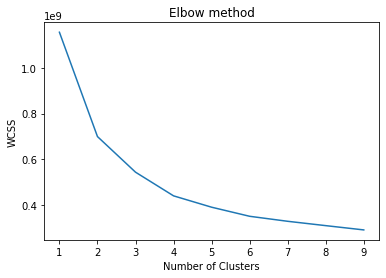

In [35]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k).fit(X_1st) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Plot the silhouette score of each of the kmeans score

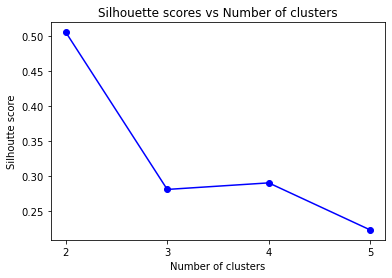

In [36]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_1st, model.labels_) for model in kmeans_models[1:5]]
plt.plot(range(2,6), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Visualizing K-means clustering using PCA

C:\Users\shuvo\AppData\Local\Temp/ipykernel_8208/1217488910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1st['clusters'] = k_means.fit_predict(X_1st)


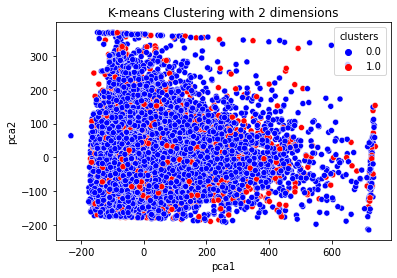

In [37]:
from sklearn.decomposition import PCA

k_means = KMeans(n_clusters=2)
X_1st['clusters'] = k_means.fit_predict(X_1st)

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_1st)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

colors1 = ["blue","red"]
sns.scatterplot(x="pca1", y="pca2", hue=X_1st['clusters'], data=results, palette=colors1)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Results

ARI and AMI scores

In [38]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

X = pd.read_csv('FinalX.csv')
y = pd.read_csv('FinalY.csv')
y2 = y.iloc[:,0]

X_1st, X_2nd, y_1st, y_2nd = train_test_split(X, y2, test_size = 0.5, random_state = 42)

k_means = KMeans(n_clusters=2)
k_means.fit(X_1st)

y_pred = k_means.predict(X_1st)

ari = adjusted_rand_score(y_1st, y_pred)
ami = adjusted_mutual_info_score(y_1st, y_pred)

print('ARI score:', ari)
print('AMI score:', ami)

ARI score: 0.11883071582065971
AMI score: 0.07407459565050548
